In [1]:
from sklearn.datasets import load_digits
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = load_digits()

x = data.data
y = data.target

x = x.reshape((1797,8,8,1))

print(x.shape)

(1797, 8, 8, 1)


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from sklearn.model_selection import train_test_split

In [4]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),activation='relu',input_shape=(8,8,1)))
classifier.add(MaxPool2D(pool_size=(2,2)))
classifier.add(Flatten())

classifier.add(Dense(units=228,activation='relu'))
classifier.add(Dense(10,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.2)

y_train = keras.utils.to_categorical(y_train, 10)

In [9]:
classifier.fit(x=x_train,y=y_train,batch_size=10,epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
1437/1437 [==============================] - 6s 4ms/step - loss: 0.5073 - acc: 0.8525
Epoch 2/10
1437/1437 [==============================] - 1s 773us/step - loss: 0.0875 - acc: 0.9708
Epoch 3/10
1437/1437 [==============================] - 1s 755us/step - loss: 0.0359 - acc: 0.9910
Epoch 4/10
1437/1437 [==============================] - 1s 773us/step - loss: 0.0295 - acc: 0.9930
Epoch 5/10
1437/1437 [==============================] - 1s 745us/step - loss: 0.0149 - acc: 0.9958
Epoch 6/10
1437/1437 [==============================] - 1s 767us/step - loss: 0.0232 - acc: 0.9930
Epoch 7/10
1437/1437 [==============================] - 1s 742us/step - loss: 0.0226 - acc: 0.9944
Epoch 8/10
1437/1437 [==============================] - 1s 771us/step - loss: 0.0033 - acc: 1.0000
Epoch 9/10
1437/1437 [==============================] - 1s 738us/step - loss: 0.0014 - acc: 1.0000
Epoch 10/10
1437/1437 [==============================] - 1s 862

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
print(classification_report(y_test,classifier.predict_classes(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        37
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        48
           5       0.98      1.00      0.99        43
           6       1.00      1.00      1.00        32
           7       0.96      1.00      0.98        26
           8       0.94      0.97      0.96        33
           9       1.00      0.88      0.94        42

   micro avg       0.98      0.98      0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [12]:
print(confusion_matrix(y_test,classifier.predict_classes(x_test)))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  0  0  0 48  0  0  0  0  0]
 [ 0  0  0  0  0 43  0  0  0  0]
 [ 0  0  0  0  0  0 32  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0]
 [ 0  1  0  0  0  0  0  0 32  0]
 [ 0  1  0  1  0  1  0  0  2 37]]


In [14]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 6, 6, 32)          320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 228)               65892     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2290      
Total params: 68,502
Trainable params: 68,502
Non-trainable params: 0
_________________________________________________________________


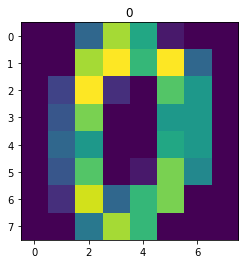

In [23]:
plt.imshow(data.data[0].reshape(8,8))
plt.title("0")
plt.savefig("label_0.png")